testing my own neural network in this one, i wLll have one begLnning layer for 10 inputs (0 to 9) and 1 output layer with 2 neurons (odd or even) and for starters i will only go ahead with 2 layers

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
m_train = 10000
X_train = np.zeros(shape=(10, m_train),dtype='int32')
y_train = np.zeros(shape=(2, m_train), dtype='int32')

for j in range(m_train):
    i = np.random.randint(0, X_train.shape[0])
    X_train[i, j] = 1
    y_train[i%2, j] = 1

In [79]:
m_test = 100
X_test = np.zeros(shape=(X_train.shape[0], m_test),dtype='int32')
y_test = np.zeros(shape=(y_train.shape[0], m_test), dtype='int32')

for j in range(m_test):
    i = np.random.randint(0, X_test.shape[0])
    X_test[i, j] = 1
    y_test[i%2, j] = 1

In [ ]:
class NeuralNetwork:

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_prime(x: np.ndarray):
        a = NeuralNetwork.sigmoid(x)
        return a * (1 - a)

    @staticmethod
    def softmax(x):
        y = np.exp(x)
        s = sum(y)
        return y / s

    @staticmethod
    def softmax_prime(x):
        a = NeuralNetwork.softmax(x)
        return a - (a**2)
    
    @staticmethod
    def act_fn(x):
        return NeuralNetwork.sigmoid(x)

    @staticmethod
    def act_fn_derivative(x):
        return NeuralNetwork.sigmoid_prime(x)

    @staticmethod
    def calculateLoss(y_true, y_pred):
        return (-1 * y_true) * np.log(y_pred)

    @staticmethod
    def calculateLossDerivative(y_true, y_pred):
        return (y_pred - y_true)

    def __init__(self, layer_sizes: list):

        self.costs = []
        self.iters = []
        self.weights = []
        self.biases = []
        self.Layers = len(layer_sizes)

        for k in range(0, len(layer_sizes) - 1):
            self.weights.append(np.zeros(shape=(layer_sizes[k + 1], layer_sizes[k])))
            self.biases.append(np.zeros(shape=(layer_sizes[k + 1], 1)))
        pass


    def forward(self, X):
        self.activations = [X]
        self.Z = []

        for i, (w, b) in enumerate(zip(self.weights, self.biases)):
            z = np.dot(w, self.activations[i]) + b
            if i == len(self.weights) - 1:
                a = NeuralNetwork.softmax(z)
            else:
                a = NeuralNetwork.act_fn(z)
            self.Z.append(z)
            self.activations.append(a)

        return self.activations[len(self.activations) - 1]

    def backward(self, X, y):

        dw = [0] * (self.Layers - 1)
        db = [0] * (self.Layers - 1)
        dz = [0] * (self.Layers)

        y_pred = self.activations[len(self.activations) - 1]

        cost = np.mean(np.sum(NeuralNetwork.calculateLoss(y, y_pred), axis=1))/2
        dz[self.Layers - 1] = NeuralNetwork.calculateLossDerivative(y, y_pred)

        for Lm1 in range(self.Layers - 2, -1, -1):
            aLm1 = self.activations[Lm1]

            dw[Lm1] = (dz[Lm1+1]) @ (aLm1.T)
            db[Lm1] = ((dz[Lm1+1])) @ np.ones(shape=(X.shape[1], 1), dtype="int32")
            dz[Lm1] = dz[Lm1+1]

        return cost, dw, db

    def train(self, X, y, alpha=0.0001, epochs=10000):
        for i in range(epochs):
            self.forward(X)
            cost, dw, db = self.backward(X, y)

            if i % (epochs // 10) == 0:
                self.costs.append(cost)
                self.iters.append(i)

            for j in range(self.Layers - 1):
                self.weights[j] -= alpha * dw[j]
                self.biases[j] -= alpha * db[j]

        return

    def predict(self, X):
        return self.forward(X)

    def evaluate(self, X, y_true):
        y_pred = self.forward(X)

        pred_labels = np.argmax(y_pred, axis=0)
        true_labels = np.argmax(y_true, axis=0)

        accuracy = np.mean(pred_labels == true_labels)
        return accuracy

In [88]:
model = NeuralNetwork([10, 10, 2])
model.train(X_train, y_train, alpha=0.0001, epochs=1000)
acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

ValueError: operands could not be broadcast together with shapes (10,10) (2,10) (10,10) 

<Axes: >

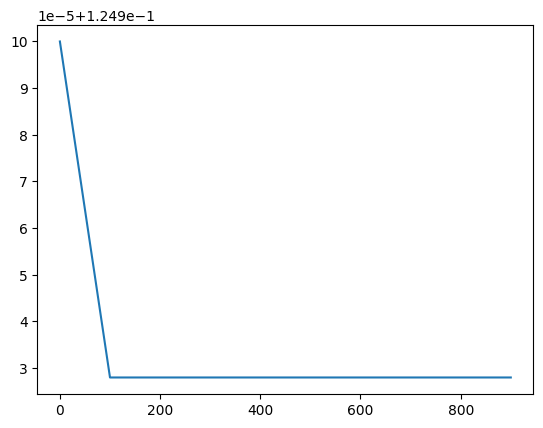

In [ ]:
sns.lineplot(x=model.iters, y = model.costs)